In [411]:
# Importing necessary libraries

# For handling and manipulating tabular data
import pandas as pd  

# For numerical computations and handling arrays
import numpy as np  

# For data visualization
import matplotlib.pyplot as plt  

# For statistical data visualization with ease
import seaborn as sns  

# For splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split  

# For implementing the Random Forest Classifier (a supervised ML algorithm)
from sklearn.ensemble import RandomForestClassifier  

# For evaluating the model's accuracy and performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  

# For encoding categorical labels into numerical format
from sklearn.preprocessing import LabelEncoder  

# For standardizing features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler  

# For recognizing speech input from a microphone
import speech_recognition as sr  

# For displaying data in a tabular format with proper formatting
from tabulate import tabulate  

In [412]:
dataset1=pd.read_csv("A_Z_medicines_dataset_of_India.csv") #Reading my dataset 1

In [413]:
dataset1.head() #Printing first 5 rows of the dataset

,id,name,price(₹),Is_discontinued,manufacturer_name,type,pack_size_label,short_composition1,short_composition2
0,1,Augmentin 625 Duo Tablet,223.42,False,Glaxo SmithKline Pharmaceuticals Ltd,allopathy,strip of 10 tablets,Amoxycillin (500mg),Clavulanic Acid (125mg)
1,2,Azithral 500 Tablet,132.36,False,Alembic Pharmaceuticals Ltd,allopathy,strip of 5 tablets,Azithromycin (500mg),NaN
2,3,Ascoril LS Syrup,118.00,False,Glenmark Pharmaceuticals Ltd,allopathy,bottle of 100 ml Syrup,Ambroxol (30mg/5ml),Levosalbutamol (1mg/5ml)
3,4,Allegra 120mg Tablet,218.81,False,Sanofi India Ltd,allopathy,strip of 10 tablets,Fexofenadine (120mg),NaN
4,5,Avil 25 Tablet,10.96,False,Sanofi India Ltd,allopathy,strip of 15 tablets,Pheniramine (25mg),NaN


In [414]:
dataset1.drop(columns=['id', 'manufacturer_name', 'type','short_composition1','short_composition2'], inplace=True)  #Dropping unnecessary columns from dataset1 to focus on relevant data and (inplace=True) will make the changes in the original dataset

In [415]:
dataset1.head() #Printing the first 5 rows after dropping the unnecessary columns

,name,price(₹),Is_discontinued,pack_size_label
0,Augmentin 625 Duo Tablet,223.42,False,strip of 10 tablets
1,Azithral 500 Tablet,132.36,False,strip of 5 tablets
2,Ascoril LS Syrup,118.00,False,bottle of 100 ml Syrup
3,Allegra 120mg Tablet,218.81,False,strip of 10 tablets
4,Avil 25 Tablet,10.96,False,strip of 15 tablets


In [416]:
dataset2=pd.read_csv("medicine_dataset.csv",dtype='str') #Reading dataset 2
dataset2.head() #Printing first 5 rows

,id,name,substitute0,substitute1,substitute2,substitute3,substitute4,sideEffect0,sideEffect1,sideEffect2,...,sideEffect41,use0,use1,use2,use3,use4,Chemical Class,Habit Forming,Therapeutic Class,Action Class
0,1,augmentin 625 duo tablet,Penciclav 500 mg/125 mg Tablet,Moxikind-CV 625 Tablet,Moxiforce-CV 625 Tablet,Fightox 625 Tablet,Novamox CV 625mg Tablet,Vomiting,Nausea,Diarrhea,...,NaN,Treatment of Bacterial infections,NaN,NaN,NaN,NaN,NaN,No,ANTI INFECTIVES,NaN
1,2,azithral 500 tablet,Zithrocare 500mg Tablet,Azax 500 Tablet,Zady 500 Tablet,Cazithro 500mg Tablet,Trulimax 500mg Tablet,Vomiting,Nausea,Abdominal pain,...,NaN,Treatment of Bacterial infections,NaN,NaN,NaN,NaN,Macrolides,No,ANTI INFECTIVES,Macrolides
2,3,ascoril ls syrup,Solvin LS Syrup,Ambrodil-LX Syrup,Zerotuss XP Syrup,Capex LS Syrup,Broxum LS Syrup,Nausea,Vomiting,Diarrhea,...,NaN,Treatment of Cough with mucus,NaN,NaN,NaN,NaN,NaN,No,RESPIRATORY,NaN
3,4,allegra 120mg tablet,Lcfex Tablet,Etofex 120mg Tablet,Nexofex 120mg Tablet,Fexise 120mg Tablet,Histafree 120 Tablet,Headache,Drowsiness,Dizziness,...,NaN,Treatment of Sneezing and runny nose due to al...,Treatment of Allergic conditions,NaN,NaN,NaN,Diphenylmethane Derivative,No,RESPIRATORY,H1 Antihistaminics (second Generation)
4,5,avil 25 tablet,Eralet 25mg Tablet,NaN,NaN,NaN,NaN,Sleepiness,Dryness in mouth,NaN,...,NaN,Treatment of Allergic conditions,NaN,NaN,NaN,NaN,Pyridines Derivatives,No,RESPIRATORY,H1 Antihistaminics (First Generation)


In [417]:
columns_to_keep = ['name', 'substitute0', 'Therapeutic Class', 'use0','sideEffect0','sideEffect1'] #Specifying the columns that I want to retain in the dataset


In [418]:
dataset2 = dataset2.loc[:, columns_to_keep] # Selecting only the specified columns from dataset2.
# The .loc[:, columns_to_keep] ensures that only the columns listed in `columns_to_keep` are included in the resulting DataFrame.
# This operation keeps the original dataset structure intact while creating a new DataFrame with just the desired columns.

In [419]:
dataset2.head()

,name,substitute0,Therapeutic Class,use0,sideEffect0,sideEffect1
0,augmentin 625 duo tablet,Penciclav 500 mg/125 mg Tablet,ANTI INFECTIVES,Treatment of Bacterial infections,Vomiting,Nausea
1,azithral 500 tablet,Zithrocare 500mg Tablet,ANTI INFECTIVES,Treatment of Bacterial infections,Vomiting,Nausea
2,ascoril ls syrup,Solvin LS Syrup,RESPIRATORY,Treatment of Cough with mucus,Nausea,Vomiting
3,allegra 120mg tablet,Lcfex Tablet,RESPIRATORY,Treatment of Sneezing and runny nose due to al...,Headache,Drowsiness
4,avil 25 tablet,Eralet 25mg Tablet,RESPIRATORY,Treatment of Allergic conditions,Sleepiness,Dryness in mouth


In [420]:
dataset1['name'] = dataset1['name'].str.strip().str.lower()
dataset2['name'] = dataset2['name'].str.strip().str.lower() #Striping any leading or trailing whitespace from the 'name' column in dataset1 and dataset2 and converting all text to lowercase.

**Dataset Merging**

In [421]:
df = pd.merge(dataset1, dataset2, on='name', how='inner') # Merging both datasets on the column 'name' and how='inner': Specifies the type of join. inner means only the rows with matching values in the 'name' column from both DataFrames will be included in the result. If a row doesn't have a match in both DataFrames, it will be excluded.

In [422]:
df.head(5)

,name,price(₹),Is_discontinued,pack_size_label,substitute0,Therapeutic Class,use0,sideEffect0,sideEffect1
0,augmentin 625 duo tablet,223.42,False,strip of 10 tablets,Penciclav 500 mg/125 mg Tablet,ANTI INFECTIVES,Treatment of Bacterial infections,Vomiting,Nausea
1,azithral 500 tablet,132.36,False,strip of 5 tablets,Zithrocare 500mg Tablet,ANTI INFECTIVES,Treatment of Bacterial infections,Vomiting,Nausea
2,ascoril ls syrup,118.00,False,bottle of 100 ml Syrup,Solvin LS Syrup,RESPIRATORY,Treatment of Cough with mucus,Nausea,Vomiting
3,allegra 120mg tablet,218.81,False,strip of 10 tablets,Lcfex Tablet,RESPIRATORY,Treatment of Sneezing and runny nose due to al...,Headache,Drowsiness
4,allegra 120mg tablet,218.81,False,strip of 10 tablets,Lcfex Tablet,RESPIRATORY,Treatment of Sneezing and runny nose due to al...,Headache,Drowsiness


In [423]:
df.shape #Provides the number of rows and columns

(256726, 9)

In [424]:
null_count=df['Therapeutic Class'].isnull().sum()
null_count

np.int64(79)

In [425]:
df_cleaned = df.dropna(subset=['Therapeutic Class'])
df_cleaned.isnull().sum()

name                     0
price(₹)                 0
Is_discontinued          0
pack_size_label          0
substitute0          10070
Therapeutic Class        0
use0                     0
sideEffect0              0
sideEffect1          10454
dtype: int64

**Visualizing Distribution of Therapeutic Classes**

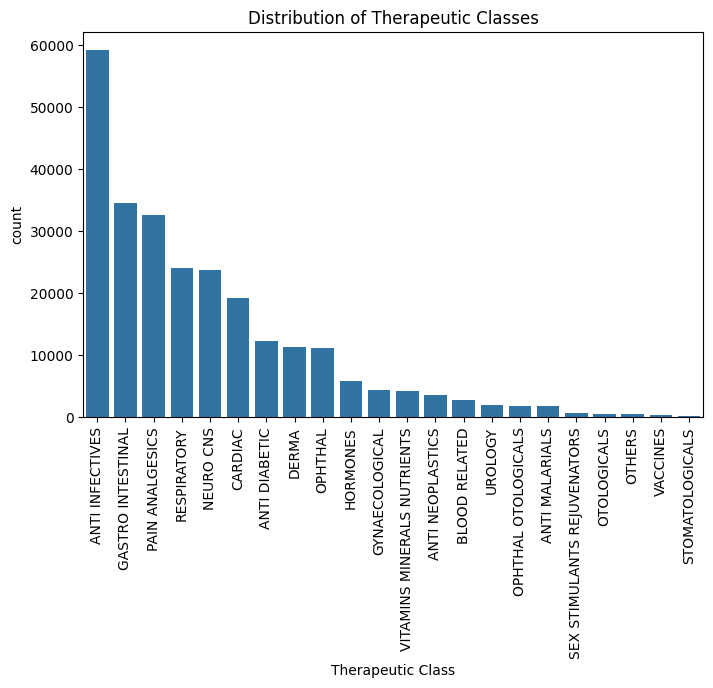

In [426]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Therapeutic Class', order=df['Therapeutic Class'].value_counts().index)# Creating a count plot for the 'Therapeutic Class' column in the DataFrame `df`
# The `order` parameter ensures the classes are displayed in descending order of their counts
plt.title('Distribution of Therapeutic Classes') #Adds title to the plot
plt.xticks(rotation=90) #Rotates the x-axis tick labels by 45 degrees for better readability
plt.show() #Display plot

**Visualizing Distribution of Medicine Prices**

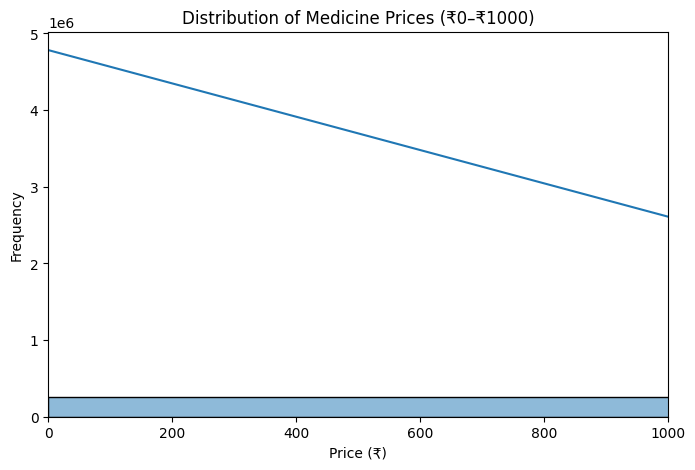

In [427]:
plt.figure(figsize=(8, 5))
# Creating a histogram for the 'price(₹)' column in the DataFrame `df`
# `kde=True` adds a Kernel Density Estimate (KDE) line for a smoothed representation of the data distribution
# `bins=30` divides the price range into 30 intervals
sns.histplot(df['price(₹)'], kde=True, bins=30)
plt.xlim(0, 1000)  # Set the x-axis limit to focus on prices within ₹1000
plt.title('Distribution of Medicine Prices (₹0–₹1000)')
plt.xlabel('Price (₹)')
plt.ylabel('Frequency')
plt.show()

**Visualizing Discontinued vs Non-discontinued Medicines**

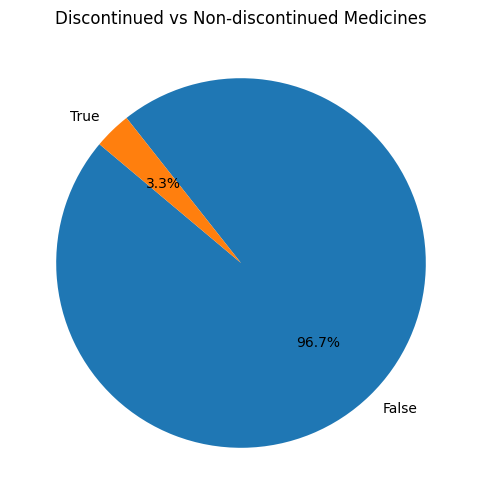

In [428]:
discontinued_counts = df['Is_discontinued'].value_counts()
plt.figure(figsize=(6, 6))
# Creating a pie chart to visualize the distribution of discontinued and non-discontinued medicines
# - `labels=discontinued_counts.index`: Uses the category names ('Yes', 'No') as labels
# - `autopct='%1.1f%%'`: Displays the percentage values on the pie slices
# - `startangle=140`: Rotates the start of the pie chart for better alignment
plt.pie(discontinued_counts, labels=discontinued_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Discontinued vs Non-discontinued Medicines')
plt.show()

In [429]:
# Fit LabelEncoder on 'Therapeutic Class' and store it
label_encoder_therapeutic_class = LabelEncoder()
df_cleaned.loc[:, 'Therapeutic Class'] = label_encoder_therapeutic_class.fit_transform(df_cleaned['Therapeutic Class'])
print("Therapeutic Class Mapping (LabelEncoder):")
for idx, label in enumerate(label_encoder_therapeutic_class.classes_):
    print(f"{idx}: {label}")


# Fit LabelEncoder on 'use0' if needed
label_encoder_use0 = LabelEncoder()
df_cleaned.loc[:,'use0'] = label_encoder_use0.fit_transform(df_cleaned['use0'].astype(str))

df.head()

Therapeutic Class Mapping (LabelEncoder):
0: ANTI DIABETIC
1: ANTI INFECTIVES
2: ANTI MALARIALS
3: ANTI NEOPLASTICS
4: BLOOD RELATED
5: CARDIAC
6: DERMA
7: GASTRO INTESTINAL
8: GYNAECOLOGICAL
9: HORMONES
10: NEURO CNS
11: OPHTHAL
12: OPHTHAL OTOLOGICALS
13: OTHERS
14: OTOLOGICALS
15: PAIN ANALGESICS
16: RESPIRATORY
17: SEX STIMULANTS REJUVENATORS
18: STOMATOLOGICALS
19: UROLOGY
20: VACCINES
21: VITAMINS MINERALS NUTRIENTS


,name,price(₹),Is_discontinued,pack_size_label,substitute0,Therapeutic Class,use0,sideEffect0,sideEffect1
0,augmentin 625 duo tablet,223.42,False,strip of 10 tablets,Penciclav 500 mg/125 mg Tablet,ANTI INFECTIVES,Treatment of Bacterial infections,Vomiting,Nausea
1,azithral 500 tablet,132.36,False,strip of 5 tablets,Zithrocare 500mg Tablet,ANTI INFECTIVES,Treatment of Bacterial infections,Vomiting,Nausea
2,ascoril ls syrup,118.00,False,bottle of 100 ml Syrup,Solvin LS Syrup,RESPIRATORY,Treatment of Cough with mucus,Nausea,Vomiting
3,allegra 120mg tablet,218.81,False,strip of 10 tablets,Lcfex Tablet,RESPIRATORY,Treatment of Sneezing and runny nose due to al...,Headache,Drowsiness
4,allegra 120mg tablet,218.81,False,strip of 10 tablets,Lcfex Tablet,RESPIRATORY,Treatment of Sneezing and runny nose due to al...,Headache,Drowsiness


**Splitting Data for Training and Testing**

In [430]:
# Selecting features (independent variables) from the dataframe
X = df_cleaned[['price(₹)', 'Is_discontinued', 'use0']]

# Selecting the target variable (dependent variable) from the dataframe
y = df_cleaned['Therapeutic Class']

In [431]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# train_test_split: A function from sklearn.model_selection used to split your dataset into training and testing subsets.

# Parameters:
# X: The features (independent variables).
# y: The target (dependent variable).
# test_size=0.2: Allocates 20% of the dataset for testing, leaving 80% for training.
# random_state=42: Ensures reproducibility by using a fixed random seed. Any consistent value can be used.


# Outputs:
# X_train: Features for the training set.
# X_test: Features for the testing set.
# y_train: Target values for the training set.
# y_test: Target values for the testing set.


**Feature Scaling**

In [432]:

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [433]:
scaler = StandardScaler() #StandardScaler:Scales the features to have a mean of 0 and a standard deviation of 1.
X_train = scaler.fit_transform(X_train) #Fit the scaler on the training data and transform it
X_test = scaler.transform(X_test) # Use the fitted scaler to transform the test data

**Training Random Forest Classifier**

In [434]:
# Initializing Random Forest Classifier with class_weight='balanced' and a fixed random_state
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Fitting the model on the training data
rf_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Printing results
print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))  # Printing accuracy score
print(classification_report(y_test, y_pred_rf))  # Printing a detailed classification report


Random Forest Results:
Accuracy: 0.9073446327683616
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2437
           1       0.92      0.89      0.90     11750
           2       0.97      0.99      0.98       340
           3       0.90      0.88      0.89       763
           4       0.83      0.84      0.84       541
           5       0.96      0.96      0.96      3853
           6       0.89      0.90      0.90      2296
           7       0.94      0.90      0.92      7043
           8       0.89      0.84      0.86       873
           9       0.97      0.95      0.96      1176
          10       0.92      0.95      0.93      4688
          11       0.60      0.67      0.64      2215
          12       0.51      0.67      0.58       351
          13       0.74      0.70      0.72        96
          14       0.18      0.67      0.29        88
          15       0.96      0.96      0.96      6580
          16       0.94     

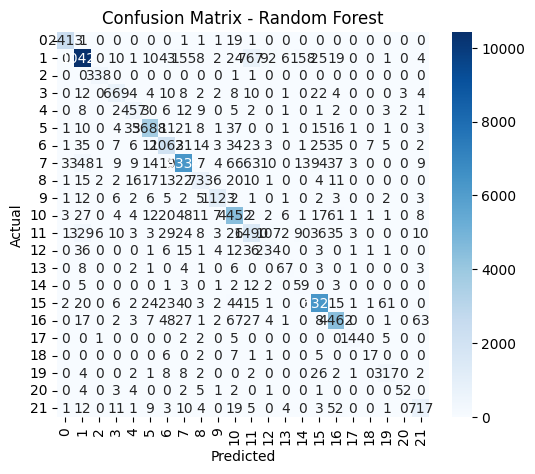

In [435]:
#Visualizing the performance of the Random Forest classifier.
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues') 
#annot=True: Annotates the heatmap cells with the numeric value (the count of predictions).
# fmt='d': Formats the annotation as integers.
# cmap='Blues': Sets the color scheme of the heatmap to shades of blue
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [436]:
def find_medicine_with_prediction(medicine_name, model, scaler, label_encoder_therapeutic_class):
    # Filter medicines that match the search term
    result = df_cleaned[df_cleaned['name'].str.contains(medicine_name, case=False, na=False)].copy()
    
    if not result.empty:
        # Preparing the medicine data and filling missing values
        result = result.fillna("Not Available")
        medicines = result[['name', 'price(₹)', 'sideEffect0', 'sideEffect1', 'substitute0']].copy()
        X_medicines = result[['price(₹)', 'Is_discontinued', 'use0']].fillna(0)

        # Scaling the features
        X_medicines_scaled = scaler.transform(X_medicines)

        # Making predictions
        predictions = model.predict(X_medicines_scaled)

        # Decoding predictions
        try:
            predicted_therapeutic_class = label_encoder_therapeutic_class.inverse_transform(predictions)
        except ValueError:
            predicted_therapeutic_class = ["Unknown"] * len(predictions)

        # Add predicted therapeutic class to the result
        medicines.loc[:, 'Predicted Therapeutic Class'] = predicted_therapeutic_class
        
        # Display the result in a table
        table = medicines[['name', 'price(₹)', 'sideEffect0', 'sideEffect1', 'substitute0', 'Predicted Therapeutic Class']].values.tolist()
        headers = ['Medicine Name', 'Price(₹)', 'Primary Side Effect', 'Secondary Side Effect', 'Substitute', 'Predicted Therapeutic Class']
        print(tabulate(table, headers=headers, tablefmt="grid"))
    else:
        print("No matching medicines found.")

# Test with a sample medicine
find_medicine_with_prediction('adn', rf_model, scaler, label_encoder_therapeutic_class)


+-----------------------------------+------------+--------------------------------------------------------------+-----------------------------+------------------------------------+-------------------------------+
| Medicine Name                     |   Price(₹) | Primary Side Effect                                          | Secondary Side Effect       | Substitute                         | Predicted Therapeutic Class   |
+===================================+============+==============================================================+=============================+====================================+===============================+
| adnurve sr tablet                 |      220   | Constipation                                                 | Weight gain                 | Pregabanyl NTM Tablet              | NEURO CNS                     |
+-----------------------------------+------------+--------------------------------------------------------------+-----------------------------+-----

In [437]:
def recognize_medicine():
    recognizer = sr.Recognizer()
    with sr.Microphone() as source:
        print("Speak the medicine name...")
        try:
            # Capturing audio input
            audio = recognizer.listen(source)
            # Recognizing speech using Google Speech Recognition
            medicine_name = recognizer.recognize_google(audio)
            print("\nYou said:", medicine_name)
            # Finding and displaying medicines in tabular format
            find_medicine_with_prediction(medicine_name,rf_model,scaler,label_encoder_therapeutic_class)
        except sr.UnknownValueError:
            print("Sorry, could not understand the audio.")
        except sr.RequestError:
            print("Could not request results. Please check your internet connection.")

# Running the function
recognize_medicine()

Speak the medicine name...
Sorry, could not understand the audio.
